# Comprovando a Teória do Caos com Python

#### Este código simula o comportamento de um pêndulo duplo e demonstra como pequenas diferenças nas condições iniciais podem levar a comportamentos significativamente diferentes no longo prazo, ilustrando a teoria do caos. Abaixo está uma descrição detalhada do código:

#### 1 - Importação das bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint

- ``numpy`` é utilizado para operações matemáticas e manipulação de arrays.
- ``matplotlib.pyplot`` é utilizado para criar gráficos e animações.
- ``FuncAnimation`` é uma classe de matplotlib.animation para criar animações.
- ``odeint`` da biblioteca scipy.integrate é usado para resolver equações diferenciais ordinárias (EDOs).


#### 2 - Definição das Equações do Movimento

In [2]:
def double_pendulum_derivatives(y, t, L1, L2, m1, m2, g):
    theta1, z1, theta2, z2 = y
    cos_delta = np.cos(theta1 - theta2)
    sin_delta = np.sin(theta1 - theta2)

    denominator1 = (m1 + m2) * L1 - m2 * L1 * cos_delta * cos_delta
    denominator2 = (L2 / L1) * denominator1

    dydt = np.zeros_like(y)

    dydt[0] = z1
    dydt[1] = ((m2 * L1 * z1 * z1 * sin_delta * cos_delta +
                m2 * g * np.sin(theta2) * cos_delta +
                m2 * L2 * z2 * z2 * sin_delta -
                (m1 + m2) * g * np.sin(theta1)) / denominator1)

    dydt[2] = z2
    dydt[3] = ((-m2 * L2 * z2 * z2 * sin_delta * cos_delta +
                (m1 + m2) * (g * np.sin(theta1) * cos_delta -
                L1 * z1 * z1 * sin_delta - g * np.sin(theta2))) / denominator2)

    return dydt


- ``double_pendulum_derivatives`` é uma função que define as equações diferenciais para o pêndulo duplo.
- ``y`` é o vetor de estado contendo os ângulos e as velocidades angulares dos pêndulos: 
\begin{bmatrix}
\theta_1 
z_1 
\theta_2 
z_2
\end{bmatrix}
- ``t`` é o vetor de tempo.
- ``L1`` e ``L2`` são os comprimentos das hastes dos pêndulos.
- ``m1`` e ``m2`` são as massas dos pêndulos.
- ``g`` é a aceleração da gravidade.
- A função calcula as derivadas dos ângulos e das velocidades angulares com base nas equações do movimento do pêndulo duplo.


#### 3. Configuração dos Parâmetros e Condições Iniciais

In [3]:
L1 = 1.0  # Comprimento do primeiro pêndulo
L2 = 1.0  # Comprimento do segundo pêndulo
m1 = 1.0  # Massa do primeiro pêndulo
m2 = 1.0  # Massa do segundo pêndulo
g = 9.81  # Aceleração da gravidade

# Condições iniciais
theta1_0 = np.pi / 2  # Ângulo inicial do primeiro pêndulo
theta2_0 = np.pi / 4  # Ângulo inicial do segundo pêndulo
z1_0 = 0.0            # Velocidade angular inicial do primeiro pêndulo
z2_0 = 0.0            # Velocidade angular inicial do segundo pêndulo

# Pequena alteração nas condições iniciais do segundo pêndulo
theta1_0_small = theta1_0
theta2_0_small = theta2_0 + 1e-9  # Diferença mínima no ângulo inicial

- Definimos os parâmetros físicos dos pêndulos, como comprimento, massa e gravidade.
- As condições iniciais são definidas para os ângulos e velocidades angulares.
- Introduzimos uma pequena diferença no ângulo inicial do segundo pêndulo para observar o impacto no comportamento do sistema.


#### 4. Integração Numérica

In [4]:
t = np.linspace(0, 100, 2000)  # Tempo total de 100 segundos com 2000 frames

# Condições iniciais para os dois sistemas
y0 = [theta1_0, z1_0, theta2_0, z2_0]
y0_small = [theta1_0_small, z1_0, theta2_0_small, z2_0]

# Integração numérica usando odeint
sol = odeint(double_pendulum_derivatives, y0, t, args=(L1, L2, m1, m2, g))
sol_small = odeint(double_pendulum_derivatives, y0_small, t, args=(L1, L2, m1, m2, g))

- ``t`` define o vetor de tempo para a simulação.
- ``odeint`` resolve as equações diferenciais para os sistemas com e sem a pequena alteração inicial.


#### 5. Conversão para Coordenadas Cartesianas

In [5]:
# Extraindo os ângulos dos pêndulos
theta1 = sol[:, 0]
theta2 = sol[:, 2]
theta1_small = sol_small[:, 0]
theta2_small = sol_small[:, 2]

# Convertendo para coordenadas cartesianas
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

x1_small = L1 * np.sin(theta1_small)
y1_small = -L1 * np.cos(theta1_small)
x2_small = x1_small + L2 * np.sin(theta2_small)
y2_small = y1_small - L2 * np.cos(theta2_small)

- Convertemos os ângulos dos pêndulos para coordenadas cartesianas para visualização no gráfico.
- Calculamos as posições das massas dos pêndulos ao longo do tempo para ambos os conjuntos de condições iniciais.


#### 6. Configuração da Animação


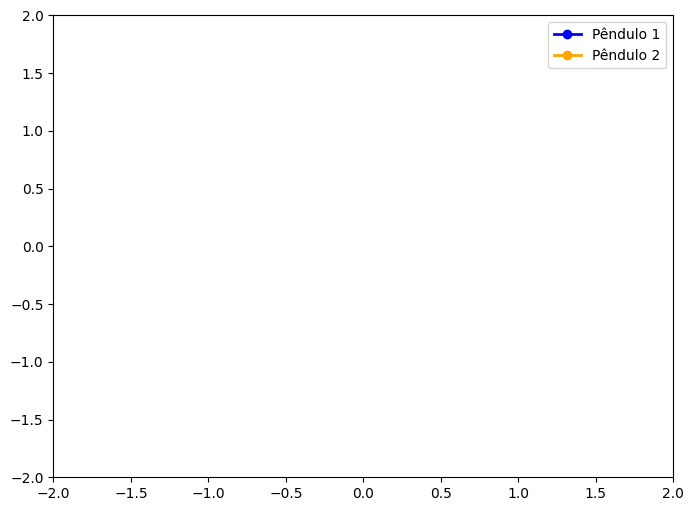

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Linhas dos pêndulos e pontos para as massas
line1, = ax.plot([], [], 'o-', color='blue', lw=2, label='Pêndulo 1')
line2, = ax.plot([], [], 'o-', color='orange', lw=2, label='Pêndulo 2')
time_template = 'Time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Função para inicializar a animação
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line1, line2, time_text

# Função para atualizar a animação
def animate(i):
    # Atualiza as posições do primeiro pêndulo
    thisx1 = [0, x1[i], x2[i]]
    thisy1 = [0, y1[i], y2[i]]
    line1.set_data(thisx1, thisy1)
    
    # Atualiza as posições do segundo pêndulo (com pequenas alterações)
    thisx2 = [0, x1_small[i], x2_small[i]]
    thisy2 = [0, y1_small[i], y2_small[i]]
    line2.set_data(thisx2, thisy2)
    
    time_text.set_text(time_template % t[i])
    
    return line1, line2, time_text

# Criação da animação
ani = FuncAnimation(fig, animate, frames=len(t),
                    init_func=init, interval=30, blit=True)

In [8]:
ani.save('pendulo_caotico.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


- Configuramos o gráfico e a animação usando ``matplotlib``.
- ``init`` inicializa os elementos do gráfico.
- ``animate`` atualiza o gráfico para cada frame da animação.
- ``FuncAnimation`` cria a animação que mostra como o sistema evolui ao longo do tempo para as duas configurações de condições iniciais.


## Conclusão
O código ilustra o comportamento caótico do pêndulo duplo, mostrando como uma pequena alteração nas condições iniciais pode levar a diferenças visíveis no movimento ao longo do tempo. A animação permite observar essas diferenças e visualizar a sensibilidade do sistema a mudanças iniciais.






